# TASK #1: PROJECT OVERVIEW

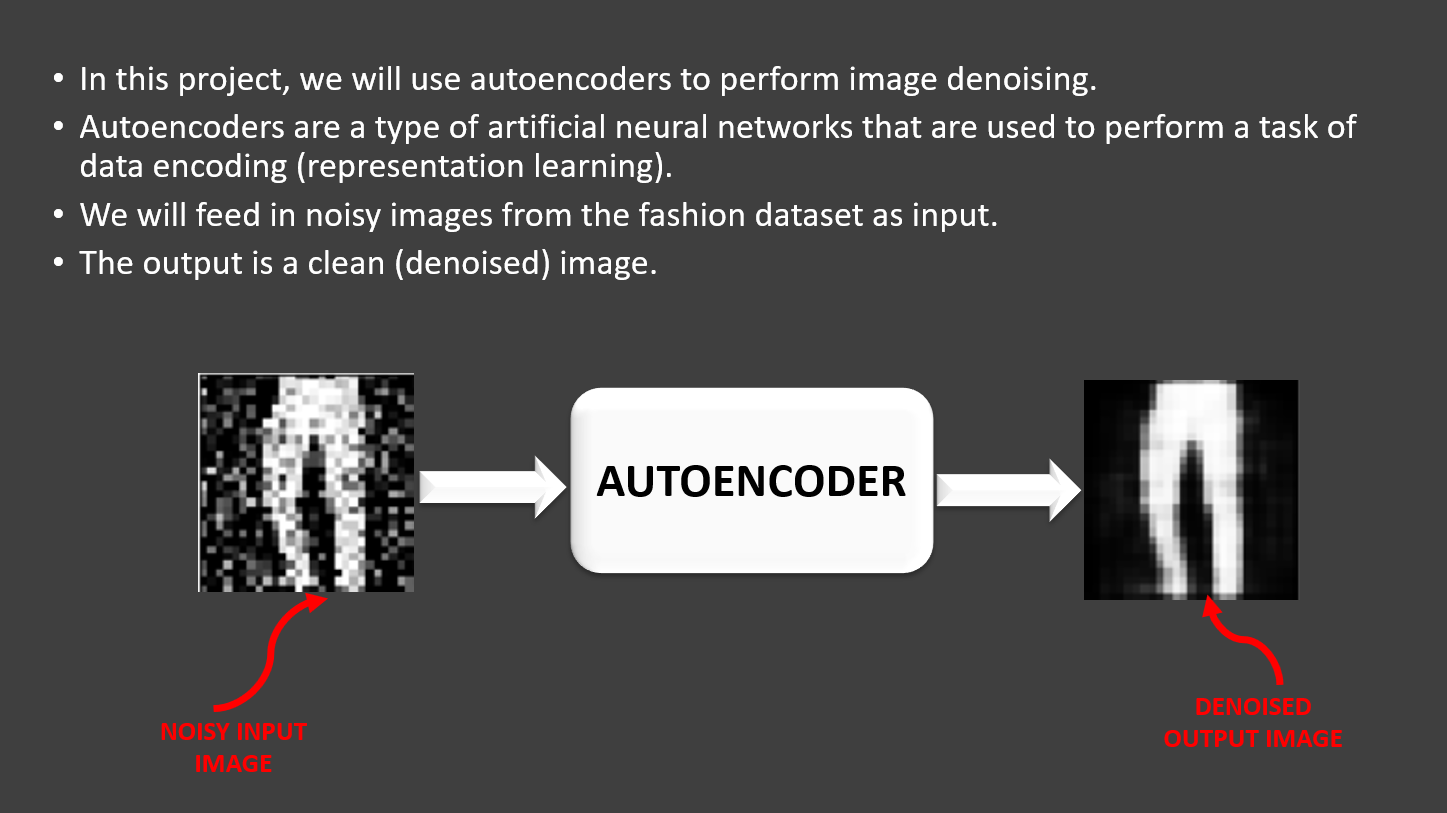

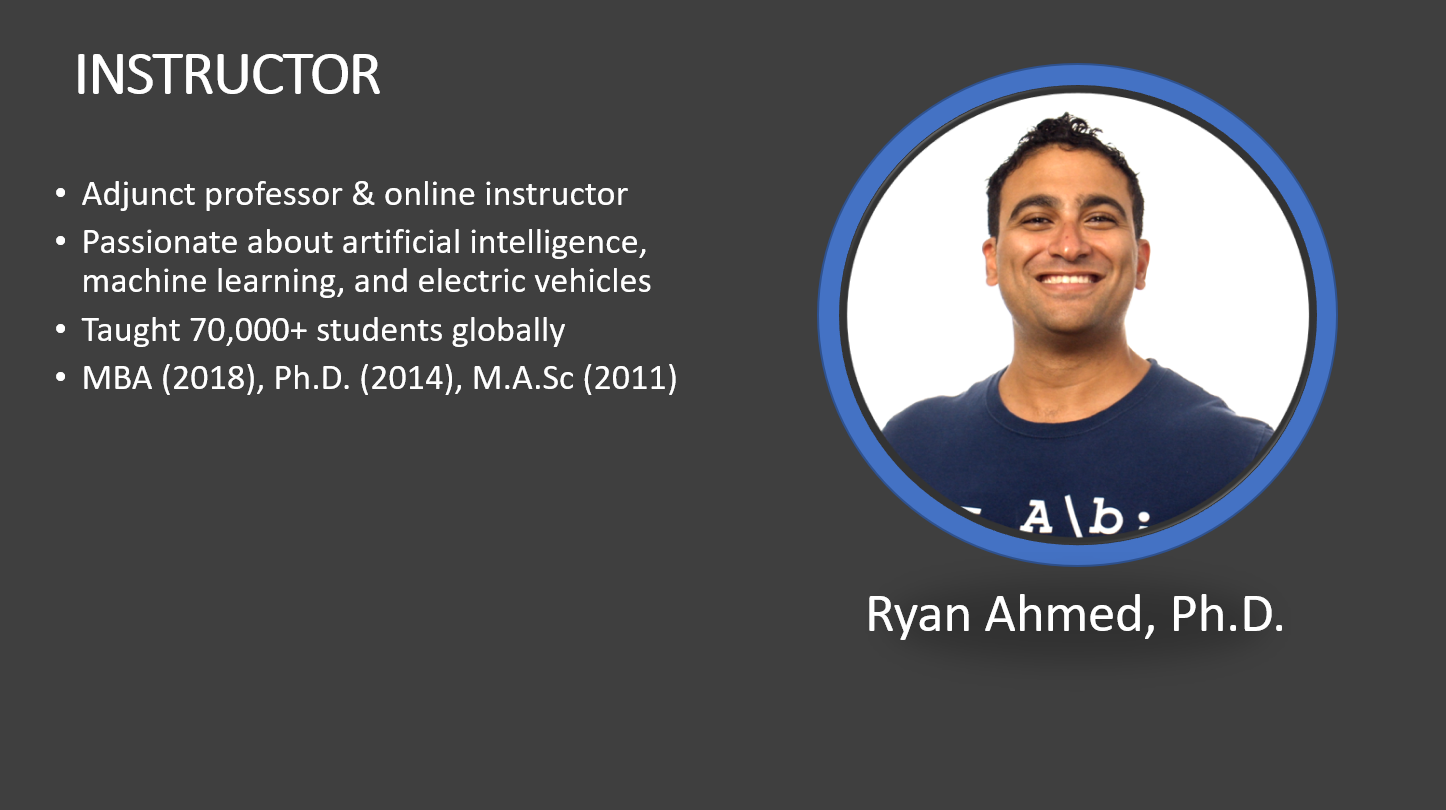

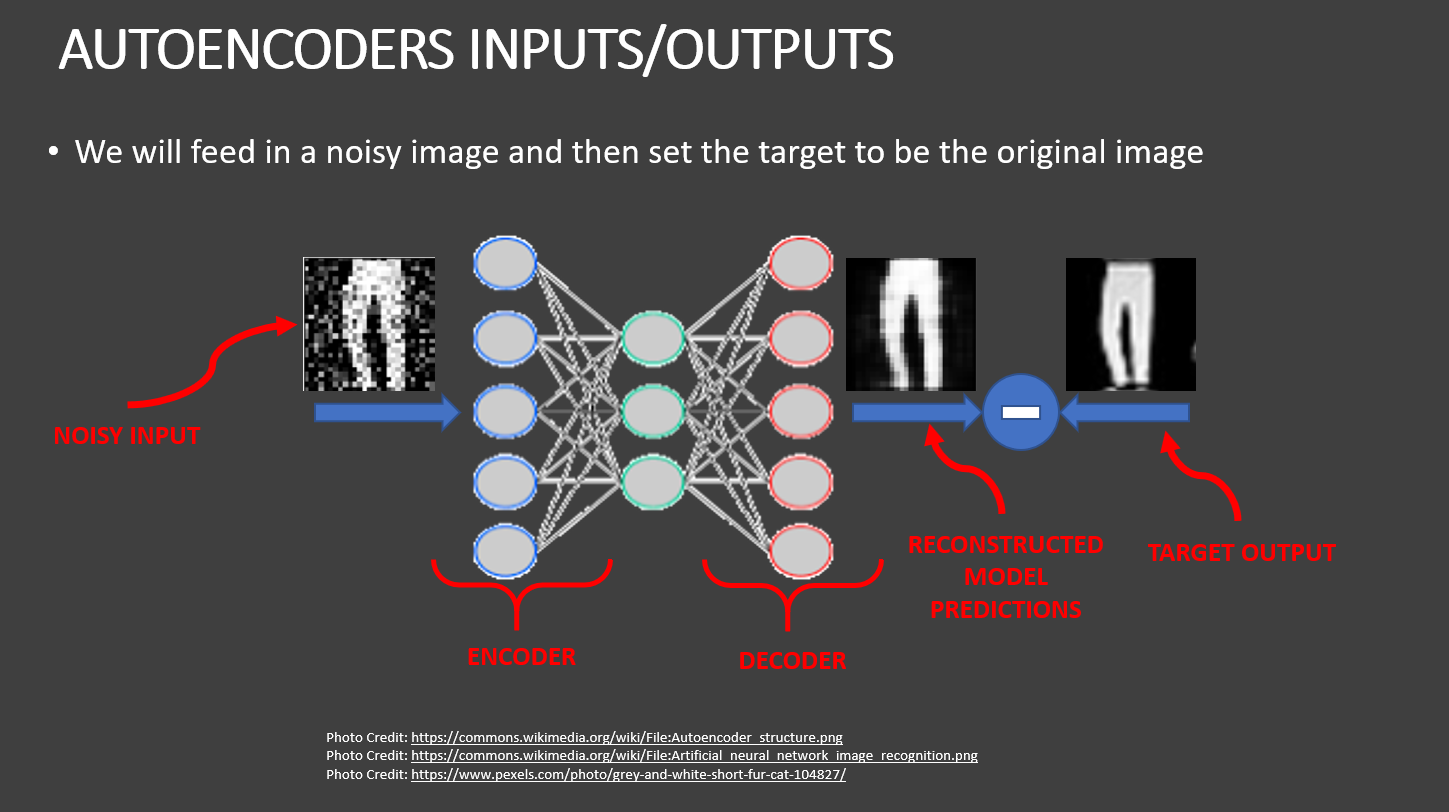

# TASK #2: IMPORT LIBRARIES AND DATASET

In [5]:

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
%matplotlib inline

In [6]:
# Load dataset 
(xtrain,ytrain),(xtest,ytest)=tf.keras.datasets.fashion_mnist.load_data()

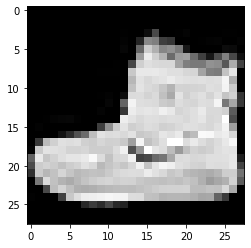

In [7]:
# Visualize as smaple image
plt.imshow(xtrain[0],cmap='gray')

In [8]:
# check out the shape of the training data
xtrain.shape

(60000, 28, 28)

In [9]:
# check out the shape of the testing data
xtest.shape

(10000, 28, 28)

# TASK #3: PERFORM DATA VISUALIZATION

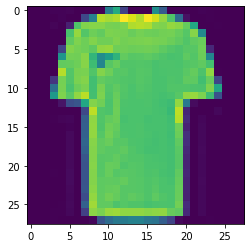

In [10]:
# Let's view some images!
i=random.randint(1,60000)
plt.imshow(xtrain[i])

In [11]:
label=ytrain[i]
print(label)


0


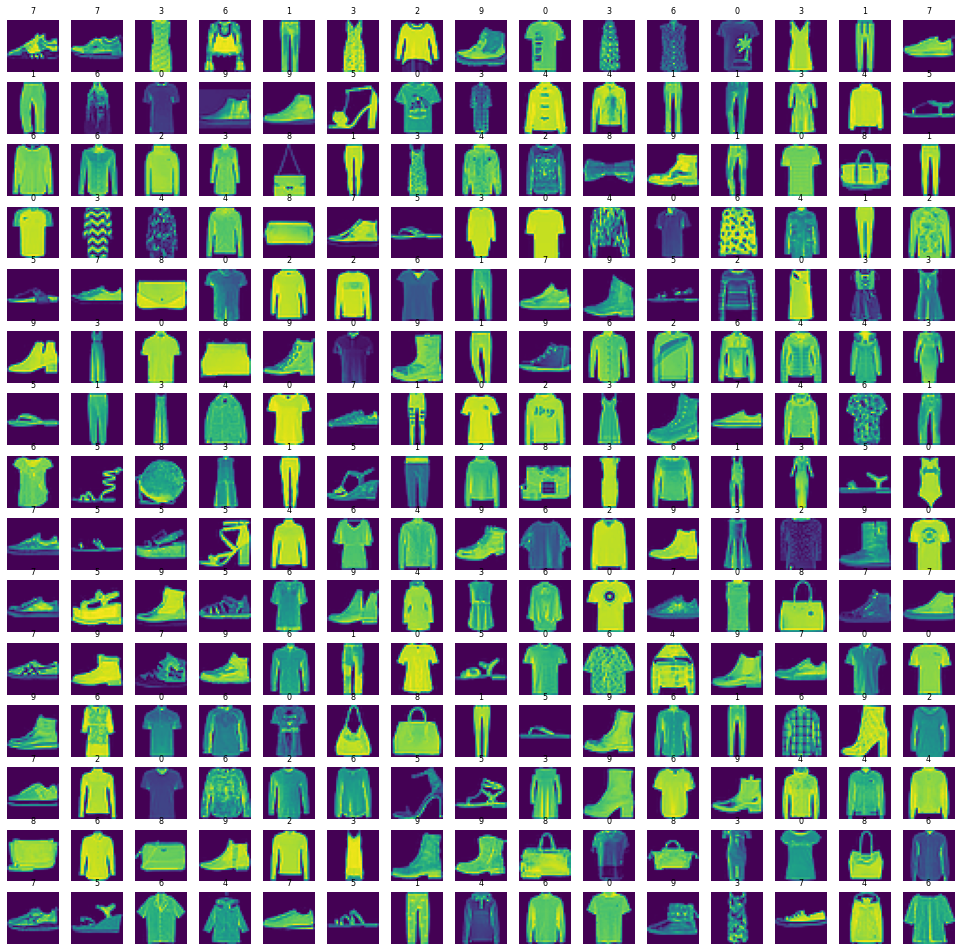

In [14]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(xtrain) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0,W_grid * L_grid):
    ind=np.random.randint(0,n_training)
    axes[i].imshow(xtrain[ind])
    axes[i].set_title(ytrain[ind],fontsize=8)
    axes[i].axis('off')


# TASK #4: PERFORM DATA PREPROCESSING

In [15]:
# normalize data
xtrain=xtrain/255
xtest=xtest/255

In [53]:
# add some noise
noise_factor=0.3
noise_dataset=[]
for img in xtrain:
    noisy_img=img + noise_factor*np.random.randn(*img.shape)
    noisy_img=np.clip(noisy_img,0,1)
    noise_dataset.append(noisy_img)

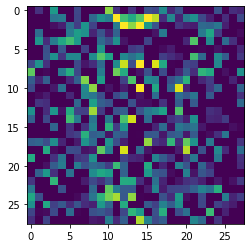

In [54]:
plt.imshow(noise_dataset[34])

In [55]:
noise_dataset_test=[]
for img in xtest:
    noisy_img=img+noise_factor * np.random.randn(*img.shape)
    noisy_img=np.clip(noisy_img,0,1)
    noise_dataset_test.append(noisy_img)

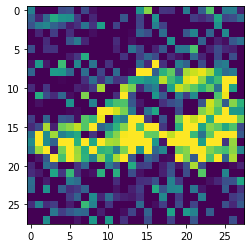

In [56]:
plt.imshow(noise_dataset_test[23])

In [57]:
noise_dataset=np.array(noise_dataset)
noise_dataset_test=np.array(noise_dataset_test)
noise_dataset.shape,noise_dataset_test.shape,xtrain.shape,xtest.shape

((60000, 28, 28), (10000, 28, 28), (60000, 28, 28), (10000, 28, 28))

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

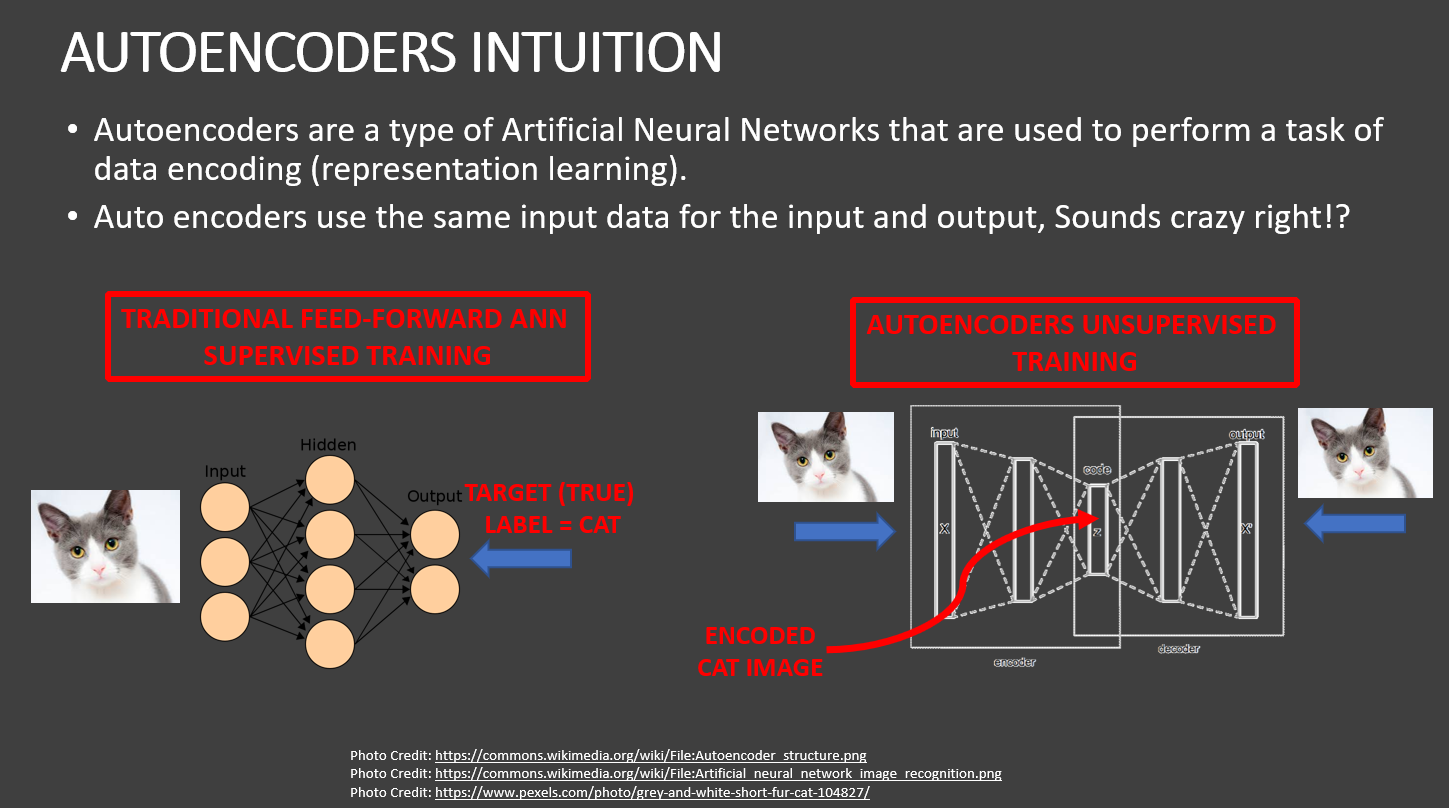

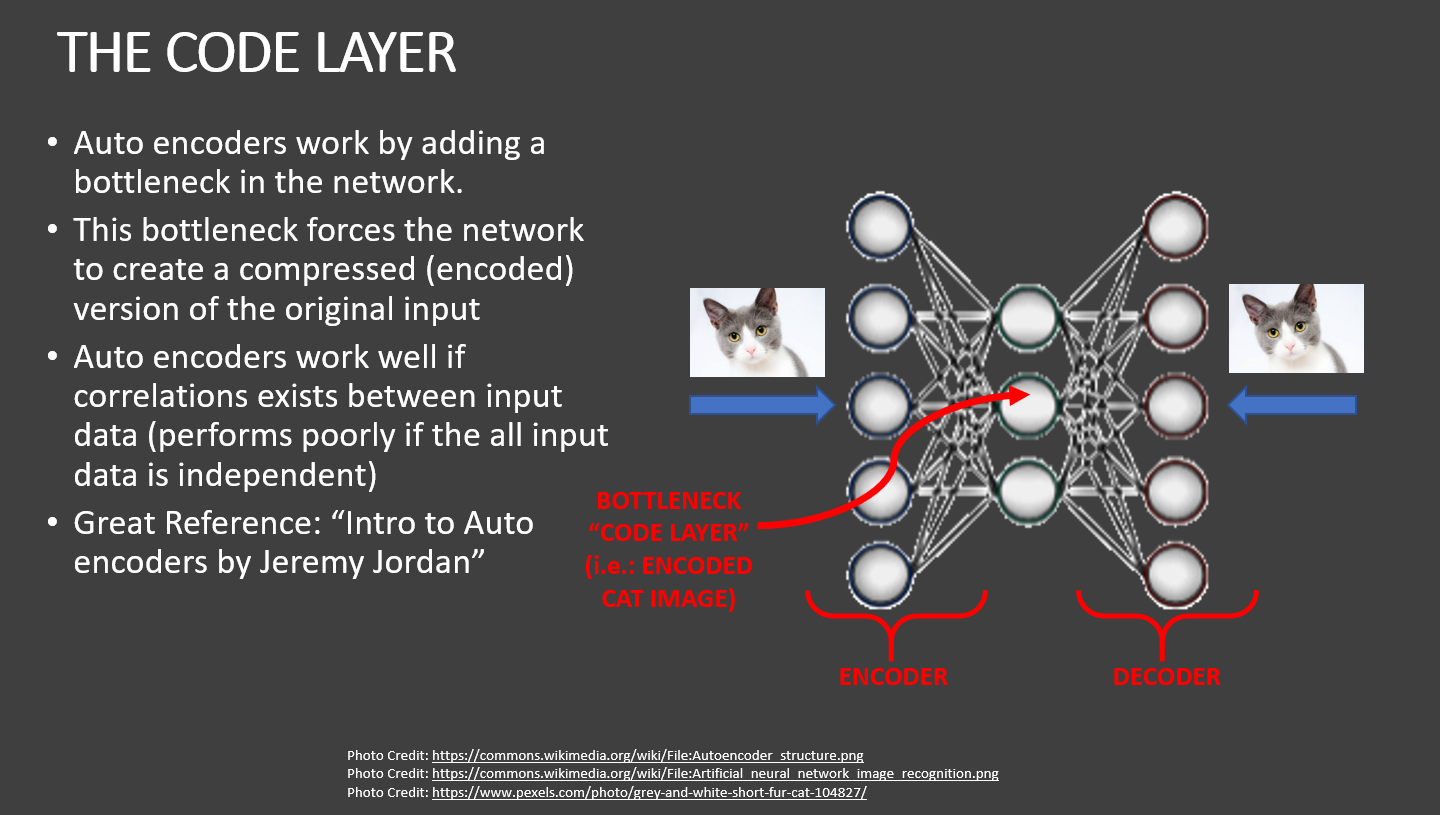

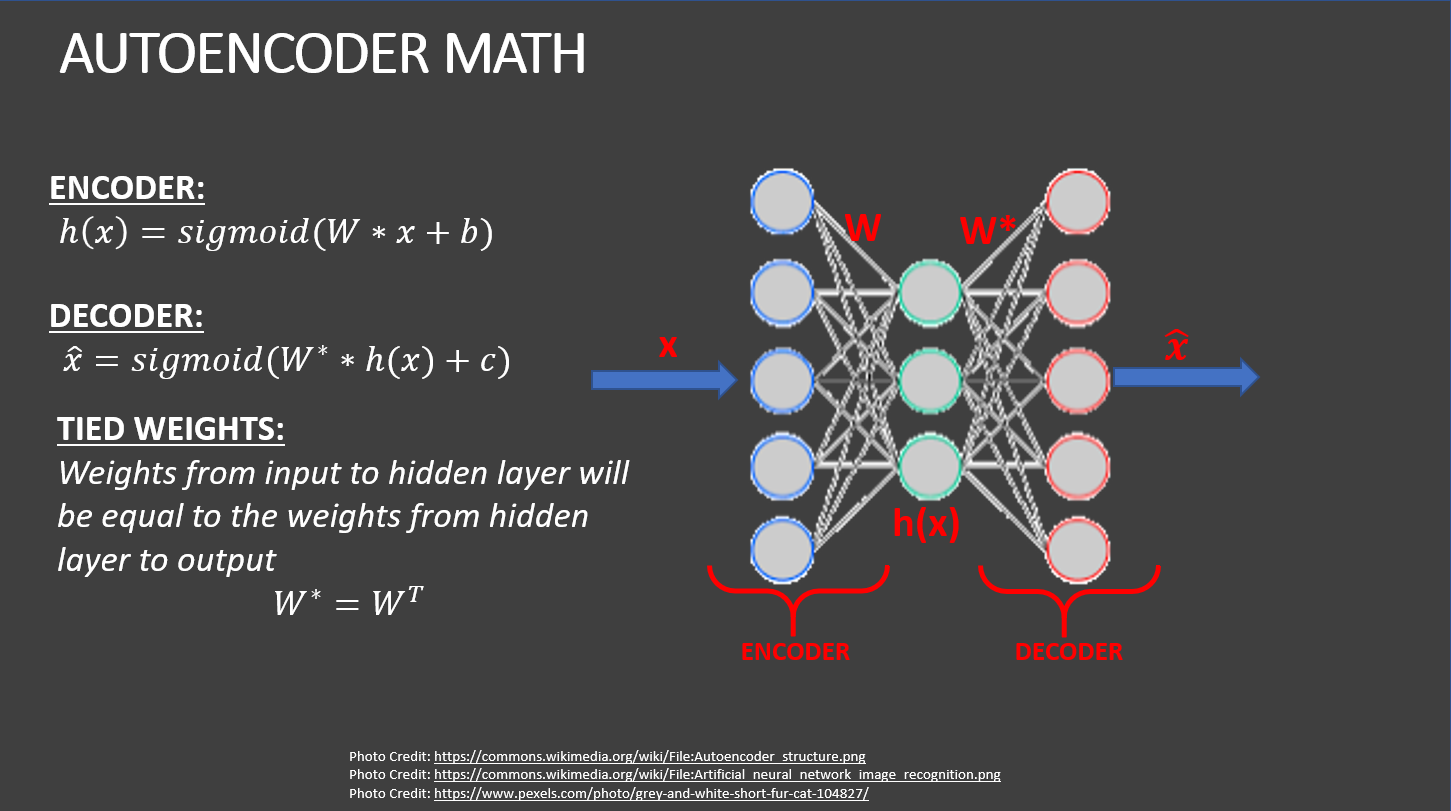

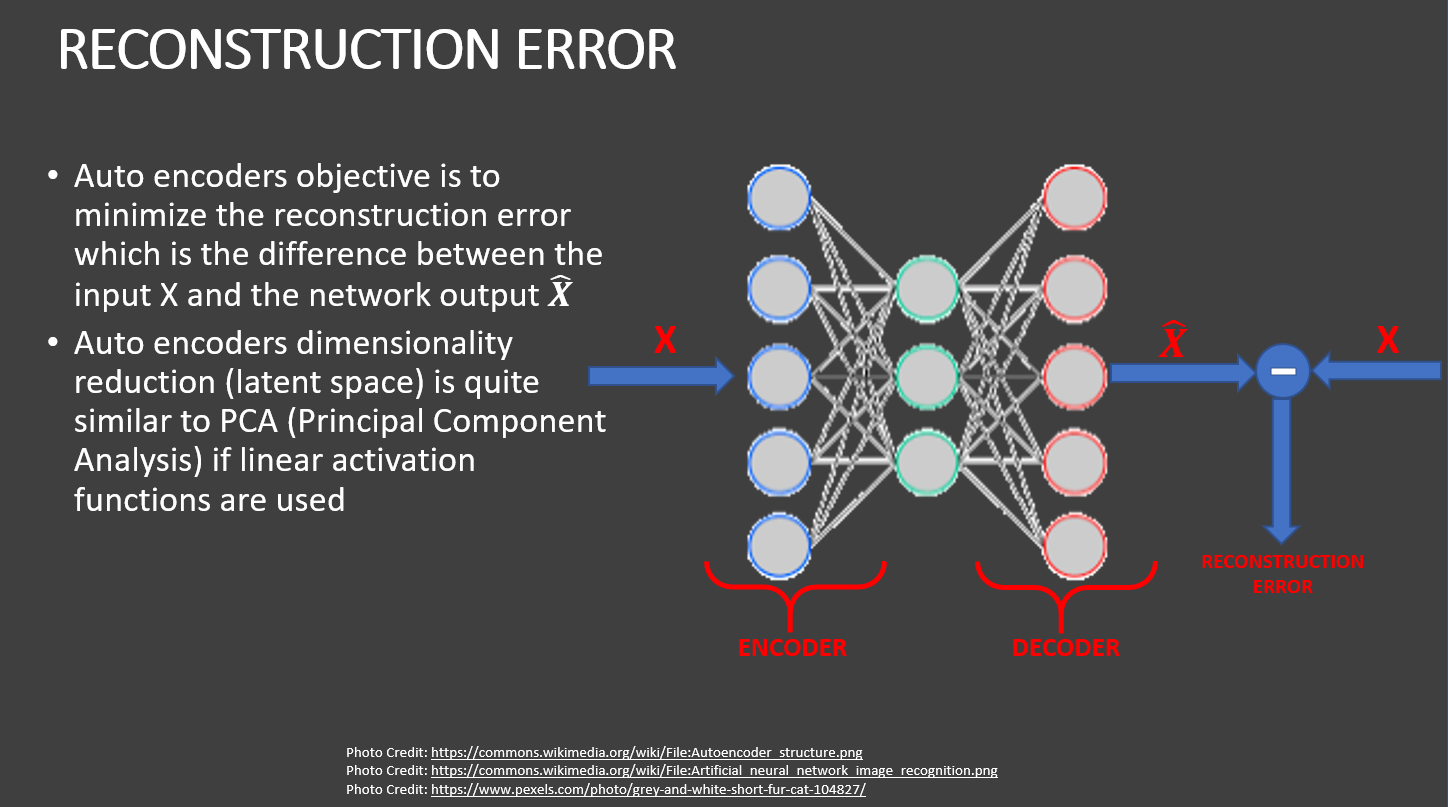

# TASK #6: BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [37]:
autoencoder = tf.keras.models.Sequential()
#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,strides=2,padding='same',input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8,kernel_size=3,strides=2,padding='same'))
autoencoder.add(tf.keras.layers.Conv2D(filters=8,kernel_size=3,strides=1,padding='same'))

#Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16,kernel_size=3,strides=2,padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1,kernel_size=3,strides=2,activation='sigmoid',padding='same'))

In [50]:
noise_dataset.shape,noise_dataset_test.shape,xtest.shape

((60000, 28, 28), (60000, 28, 28), (10000, 28, 28))

In [58]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [59]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               xtrain.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_dataset_test.reshape(-1, 28, 28, 1), xtest.reshape(-1, 28, 28, 1)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 462us/sample - loss: 0.3981 - val_loss: 0.3253
Epoch 2/10
60000/60000 [==============================] - 27s 458us/sample - loss: 0.3160 - val_loss: 0.3135
Epoch 3/10
60000/60000 [==============================] - 27s 455us/sample - loss: 0.3085 - val_loss: 0.3089
Epoch 4/10
60000/60000 [==============================] - 27s 455us/sample - loss: 0.3055 - val_loss: 0.3069
Epoch 5/10
60000/60000 [==============================] - 28s 459us/sample - loss: 0.3040 - val_loss: 0.3056
Epoch 6/10
60000/60000 [==============================] - 28s 474us/sample - loss: 0.3028 - val_loss: 0.3046
Epoch 7/10
60000/60000 [==============================] - 28s 472us/sample - loss: 0.3019 - val_loss: 0.3038
Epoch 8/10
60000/60000 [==============================] - 28s 472us/sample - loss: 0.3013 - val_loss: 0.3032
Epoch 9/10
60000/60000 [==============================] - 28s 471us/sample - l

# TASK #7: EVALUATE TRAINED MODEL PERFORMANCE

In [61]:
evaluation=autoencoder.evaluate(noise_dataset_test.reshape(-1,28,28,1),xtest.reshape(-1,28,28,1))
print('Test Accuracy: {:.3f}'.format(evaluation))

10000/10000 [==============================] - 3s 271us/sample - loss: 0.3025
Test Accuracy: 0.303


In [62]:
predicted=autoencoder.predict(noise_dataset_test[:10].reshape(-1,28,28,1))

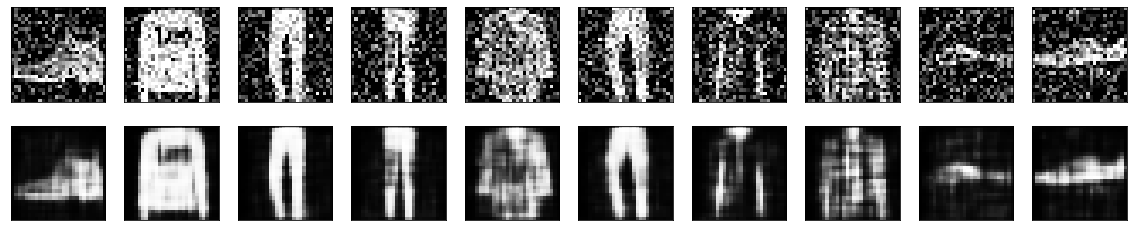

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_dataset_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# EXCELLENT WORK!

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot